# Simulated Dataset 2: Different Noise Levels and Combinations

## Loading package

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scanpy as sc
import pandas as pd
import os
import warnings
# filter out all warnings
warnings.filterwarnings('ignore')

np.random.seed(2024)

# the location of R (used for the mclust clustering)
os.environ['R_HOME'] = 'E:/R-4.3.1'
os.environ['R_USER'] = 'E:/anaconda/lib/site-packages/rpy2'
from sklearn.metrics.cluster import adjusted_rand_score
from utils_ours import mclust_R

## Loading data

In [ ]:
file_fold_1 = 'D:/study/learning/spatial_transcriptome/codes/SpatialGlue-main/data/Dataset11_Human_Lymph_Node_A1/adata_RNA'
file_fold_2 = 'D:/study/learning/spatial_transcriptome/codes/SpatialGlue-main/data/Dataset11_Human_Lymph_Node_A1/adata_ADT'

adata_omics_1_1 = sc.read_h5ad(file_fold_1 + '.h5ad')
adata_omics_1_2 = sc.read_h5ad(file_fold_2 + '.h5ad')

# 读取注释文件
Ann_df = pd.read_csv('D:/study/learning/spatial_transcriptome/codes/SpatialGlue-main/data/ours/4_Human_Lymph_Node/annotation.txt', sep='\t', header=None, index_col=0)
Ann_df.columns = ['Ground Truth']
adata_omics_1_1.obs['Ground Truth'] = Ann_df.loc[adata_omics_1_1.obs_names, 'Ground Truth']
adata_omics_1_2.obs['Ground Truth'] = Ann_df.loc[adata_omics_1_2.obs_names, 'Ground Truth']

# 定义类别列表
categories = ['medulla cords', 'medulla sinuses', 'cortex', 'pericapsular adipose tissue']

# 筛选数据
adata_omics_1_1 = adata_omics_1_1[adata_omics_1_1.obs['Ground Truth'].isin(categories)]
adata_omics_1_2 = adata_omics_1_2[adata_omics_1_2.obs['Ground Truth'].isin(categories)]

# 转换数据格式并计算平均值
RNA = adata_omics_1_1.X.toarray()
protein = adata_omics_1_2.X.toarray()
RNA = np.average(RNA, axis=1)
protein = np.average(protein, axis=1)

## Visualize the distribution of raw data

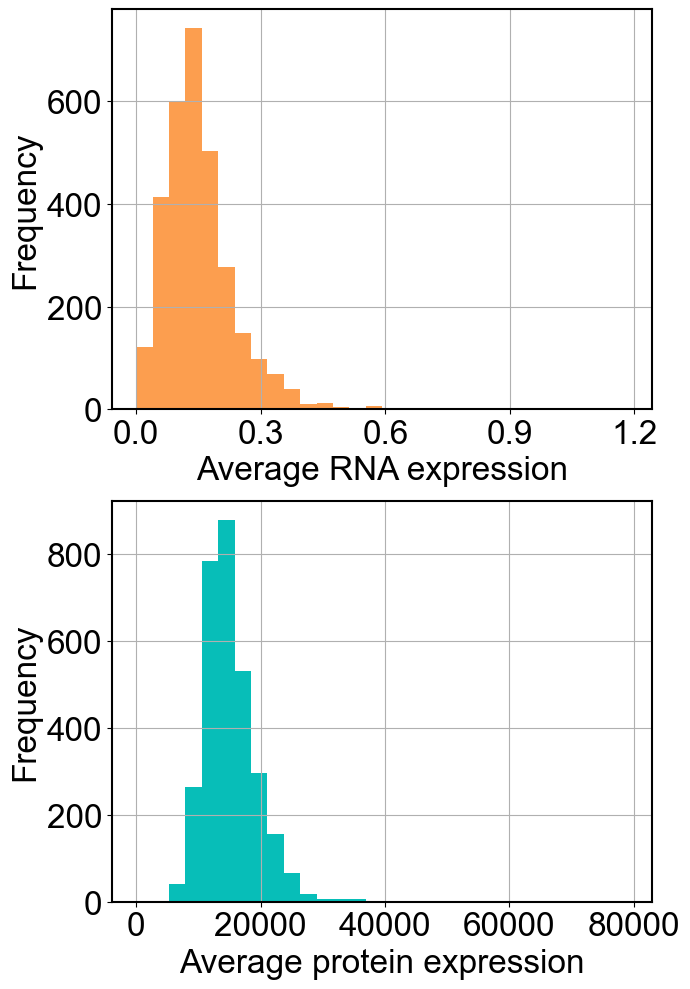

In [ ]:
fontsize = 24
plt.figure(figsize=(7, 10))

# RNA
ax1 = plt.subplot(2, 1, 1)
hist = plt.hist(RNA, bins=30, color='#fc9e4f', alpha=1)
plt.title('')
plt.xlabel('Average RNA expression', fontsize=fontsize, fontname='Arial')
plt.ylabel('Frequency', fontsize=fontsize, fontname='Arial')
plt.tick_params(axis='both', labelsize=fontsize)
ticks = np.arange(0, 1.21, 0.3)
plt.xticks(ticks)
ax1.grid(True)
ax1.spines['top'].set_linewidth(1.5)
ax1.spines['right'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)
ax1.spines['left'].set_linewidth(1.5)

# Protein
ax2 = plt.subplot(2, 1, 2)
plt.hist(protein, bins=30, color='#07beb8', alpha=1)
plt.title('')
plt.xlabel('Average protein expression', fontsize=fontsize, fontname='Arial')
plt.ylabel('Frequency', fontsize=fontsize, fontname='Arial')
ticks = np.arange(0, 80001, 20000)
plt.xticks(ticks)
plt.tick_params(axis='both', labelsize=fontsize)
ax2.grid(True)
ax2.spines['top'].set_linewidth(1.5)
ax2.spines['right'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.spines['left'].set_linewidth(1.5)

plt.tight_layout()
plt.show()

## Arc Pattern: Utilized for Further Analysis

In [ ]:
file_fold_1 = 'D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/simulation_scenario_3/simulation3_RNA'
file_fold_2 = 'D:/study/learning/spatial_transcriptome/papers/spatial_multi_omics-main/data/simulation_scenario_3/simulation3_Protein'

adata_omics_1_1 = sc.read_h5ad(file_fold_1 + '.h5ad')
adata_omics_1_2 = sc.read_h5ad(file_fold_2 + '.h5ad')

sc.tl.pca(adata_omics_1_1)
sc.tl.pca(adata_omics_1_2)

## 
x_values = np.linspace(0, 120, 30, endpoint=False)
y_values = np.linspace(0, 120, 40, endpoint=False)

coordinates = np.zeros((30 * 40, 2), dtype=int)

for i in range(30):
    for j in range(40):
        coordinates[i * 40 + j, 0] = x_values[i]
        coordinates[i * 40 + j, 1] = y_values[j]

distances = np.sqrt((coordinates[:, 0] - 0) ** 2 + (coordinates[:, 1] - 0) ** 2)

sorted_indices = np.argsort(distances)
sorted_coordinates = coordinates[sorted_indices]

adata_omics_1_1.obsm['spatial'] = sorted_coordinates
adata_omics_1_2.obsm['spatial'] = sorted_coordinates

In [20]:
adata_omics_1_1_copy = adata_omics_1_1.copy()
adata_omics_1_2_copy = adata_omics_1_2.copy()

## Basic data characteristics

In [ ]:
# Calculate the mean of non-zero elements
non_zero_mean = np.mean(adata_omics_1_1_copy.X[adata_omics_1_1_copy.X != 0])

# Calculate the variance of non-zero elements
non_zero_var = np.var(adata_omics_1_1_copy.X[adata_omics_1_1_copy.X != 0])

non_zero_count = np.count_nonzero(adata_omics_1_1_copy.X)
print("Number of non-zero elements:", non_zero_count)

print("Mean of non-zero elements:", non_zero_mean)
print("Variance of non-zero elements:", non_zero_var)

# Calculate the mean of non-zero elements
non_zero_mean = np.mean(adata_omics_1_2_copy.X[adata_omics_1_2_copy.X != 0])

# Calculate the variance of non-zero elements
non_zero_var = np.var(adata_omics_1_2_copy.X[adata_omics_1_2_copy.X != 0])

non_zero_count = np.count_nonzero(adata_omics_1_2_copy.X)
print("Number of non-zero elements:", non_zero_count)

print("Mean of non-zero elements:", non_zero_mean)
print("Variance of non-zero elements:", non_zero_var)

## Adding noise

In [ ]:
from utils import generate_noise
mean1 = np.mean(adata_omics_1_1_copy.X)
mean2 = np.mean(adata_omics_1_2_copy.X)

std1 = 0
std2 = 0

dropout_rate_1 = 0.2
dropout_rate_2 = 0.2
## 'gaussian' or 'dropout'
adata_omics_1_1.obsm['level_3'] = generate_noise(adata_omics_1_1_copy.X, mean=mean1, std=std1, mode='dropout', dropout_rate=dropout_rate_1)
adata_omics_1_2.obsm['level_3'] = generate_noise(adata_omics_1_2_copy.X, mean=mean2, std=std2, mode='dropout', dropout_rate=dropout_rate_2)

7.01472154695794
7.410527610135875


In [ ]:
## save the noised data
# adata_omics_1_1.write_h5ad('./simulation8_RNA.h5ad')
# adata_omics_1_2.write_h5ad('./simulation8_Protein.h5ad')